In [27]:
"""Halton low discrepancy sequence.
This snippet implements the Halton sequence following the generalization of
a sequence of *Van der Corput* in n-dimensions.
---------------------------
MIT License
Copyright (c) 2017 Pamphile Tupui ROY
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""
import numpy as np
def primes_from_2_to(n):
    """Prime number from 2 to n.
    From `StackOverflow <https://stackoverflow.com/questions/2068372>`_.
    :param int n: sup bound with ``n >= 6``.
    :return: primes in 2 <= p < n.
    :rtype: list
    """
    sieve = np.ones(n // 3 + (n % 6 == 2), dtype=np.bool)
    for i in range(1, int(n ** 0.5) // 3 + 1):
        if sieve[i]:
            k = 3 * i + 1 | 1
            sieve[k * k // 3::2 * k] = False
            sieve[k * (k - 2 * (i & 1) + 4) // 3::2 * k] = False
    return np.r_[2, 3, ((3 * np.nonzero(sieve)[0][1:] + 1) | 1)]


def van_der_corput(n_sample, base=2):
    """Van der Corput sequence.
    :param int n_sample: number of element of the sequence.
    :param int base: base of the sequence.
    :return: sequence of Van der Corput.
    :rtype: list (n_samples,)
    """
    sequence = []
    for i in range(n_sample):
        n_th_number, denom = 0., 1.
        while i > 0:
            i, remainder = divmod(i, base)
            denom *= base
            n_th_number += remainder / denom
        sequence.append(n_th_number)

    return sequence


def halton(dim, n_sample):
    """Halton sequence.
    :param int dim: dimension
    :param int n_sample: number of samples.
    :return: sequence of Halton.
    :rtype: array_like (n_samples, n_features)
    """
    big_number = 10
    while 'Not enought primes':
        base = primes_from_2_to(big_number)[:dim]
        if len(base) == dim:
            break
        big_number += 1000

    # Generate a sample using a Van der Corput sequence per dimension.
    sample = [van_der_corput(n_sample + 1, dim) for dim in base]
    sample = np.stack(sample, axis=-1)[1:]

    return sample

41.501803586851615
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


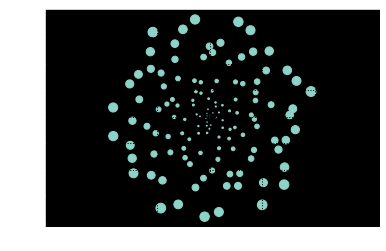

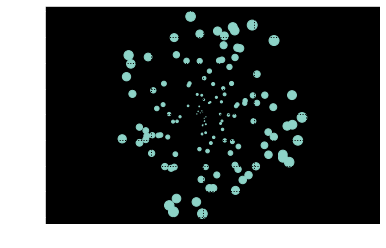

In [40]:
import matplotlib.pyplot as plt
from math import pi, cos, sin
from random import random
%matplotlib notebook
%matplotlib inline

hseq = halton(2, 1000)
#print(hseq)
hcnt = 0
weight_sum = 0.0

def point_halton():
    global hcnt, hseq, weight_sum
    x = hseq[hcnt][0]
    y = hseq[hcnt][1]
    hcnt += 1
    theta = x * 2 * pi
    rad = y * 10.0
    weight_sum += (y * y)
    return cos(theta) * rad, sin(theta) * rad, rad * rad

xys_halton = [point_halton() for _ in range(128)]

def point_vanilla():
    x = random()
    y = random()
    theta = x * 2 * pi
    rad = y * 10.0
    return cos(theta) * rad, sin(theta) * rad, rad * rad

xys_vanila = [point_vanilla() for _ in range(128)]

print (weight_sum)

plt.figure()
plt.scatter(*zip(*xys_halton))
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

plt.figure()
plt.scatter(*zip(*xys_vanila))
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


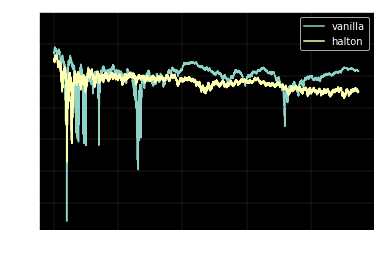

In [56]:
N = 10000
import math
def circle_area_vanilla(N):
    out = []
    cnt_inside = 0
    for i in range(0, N):
        x = random()
        y = random()
        if x*x + y*y < 1.0:
            cnt_inside += 1
        out.append(abs(pi - 4.0 * float(cnt_inside)/(i+1)))
    return out

hseq = halton(2, N)
hcnt = 0

def circle_area_halton(N):
    global hseq, hcnt
    out = []
    cnt_inside = 0
    for i in range(0, N):
        x = hseq[hcnt][0]
        y = hseq[hcnt][1]
        hcnt += 1
        if x*x + y*y < 1.0:
            cnt_inside += 1
        out.append(abs(pi - 4.0 * float(cnt_inside)/(i+1)))
    return out
plt.figure()
START = 512
# ax.set(xlabel='Samples', ylabel='vanilla')
plt.plot(circle_area_vanilla(N)[START:])
# ax.set(xlabel='Samples', ylabel='halton')
plt.plot(circle_area_halton(N)[START:])
plt.legend(("vanilla", "halton"))
plt.grid(color='w', linestyle='-', linewidth=0.1)
plt.yscale('log')
plt.ylim([0.0, 1.0])
#plt.axes().set_aspect('equal', 'datalim')
plt.show()

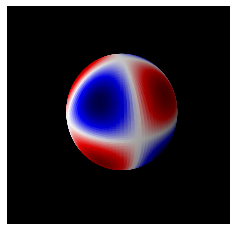

In [30]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
%matplotlib notebook
%matplotlib inline
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()